## GRIP-The Sparks Foundation April'21
Task 1 : Prediction Using Supervised Machine Learning

Author : Abhay Singhal

Objective: To predict percentage of a student based on no. of study hours

Method Adopted-Simple Linear Regression

Libraries used:Pandas, Numpy, Matplotlib, ScikitLearn

In [1]:
## First we have Import necessary library packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## reading data from a link
students_data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

## To read the first five elements
students_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
## To check if there are any null values
students_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
## To find Summary of our Dataset
students_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


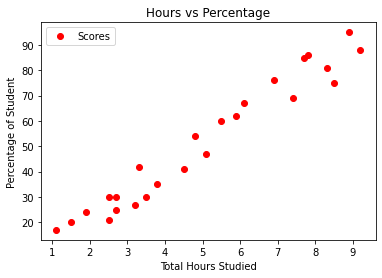

In [5]:
# Plotting the distribution of scores
students_data.plot(x='Hours', y='Scores', color='red', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Total Hours Studied')  
plt.ylabel('Percentage of Student')  
plt.show()

From the graph above, we can see that there is a positive linear relation between the number of hours studied and percentage of score.


Prepare the data

In [6]:
### Selecting the variables i.e. the Attribute and Labels
X= students_data.iloc[: , 0:1].values   #iloc() can be used to fetch records based on the index values from the datasets.
Y= students_data.iloc[: , 1].values
print("X values", X)
print("Y values", Y)

X values [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Y values [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now we will split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [8]:
## Splitting the dataset into Train and Test Data . We'll do this by using Scikit-Learn's built-in train_test_split() method

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

Training the data

In [9]:
### Training the algorithm
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
print('Training Completed')
#now we have complete the training

Training Completed


In [10]:
## Intercept and Coefficient of the SLR model

print('The Intercept is : ', regr.intercept_) #This is the inbuilt function and it is used to find the intercept(bo) of the regression line 
print('The Coefficient is : ', regr.coef_)    #This is the inbuilt function and it is used to find the coeff.(b1) of the regression line 

The Intercept is :  1.932204253151646
The Coefficient is :  [9.94167834]




#The value 𝑏₀ = 1.93 (approximately) illustrates that our model predicts the response 1.93 when 𝑥 is zero. The value 𝑏₁ = 9.94 means that the predicted response rises by 9.94 when 𝑥 is increased by one.

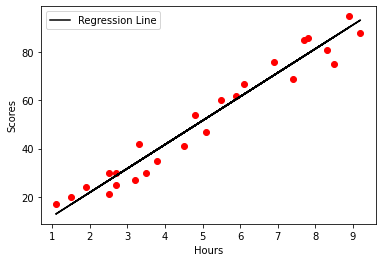

In [11]:
## Plotting the regression line
regr_line=regr.coef_*X+regr.intercept_     #reg_line= b1*x + bo
 
## Plotting for test data
plt.scatter(X,Y,color='red',)                                     #means plot x and y values
plt.plot(X,regr_line,color='black',label='Regression Line')       #means plot x and reg_line values
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

Prediction 

In [12]:
## To print the Predicted values

Y_predicted = regr.predict(X_test)
print(Y_predicted)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [13]:
## Comparision between the Actual and Predicted Values

ActualVsPred = pd.DataFrame({'Actual':Y_test,'Predicted':Y_predicted})
ActualVsPred

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [14]:
## To predict the Score/Precentage when a student studies for 9.25 hours

hours= [[9.25]]
pred=regr.predict(hours)
print("No of Hours = ", hours[0][0])
print("Predicted Score = ", pred[0])

No of Hours =  9.25
Predicted Score =  93.89272889341655


Evaluating the model

In [15]:
# Model Evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))
print('R2 Score is: ',metrics.r2_score(Y_test,Y_predicted))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055
R2 Score is:  0.9367661043365055
